In [1]:
import pandas as pd
import numpy as np

adv = pd.read_csv("Advertising.csv")

X_tv = adv.iloc[:, 1].values.reshape(-1,1)
X_radio = adv.iloc[:, 2].values.reshape(-1,1)
X_np = adv.iloc[:, 3].values.reshape(-1,1)
y = adv.iloc[:, -1].values.reshape(-1,1)

In [2]:
corr_tv = np.corrcoef(X_tv.T, y.T)[0, 1]
corr_radio = np.corrcoef(X_radio.T, y.T)[0, 1]
corr_np = np.corrcoef(X_np.T, y.T)[0, 1]

print("***Correlation TV/Sales***")
print(corr_tv)
print("")
print("***Correlation Radio/Sales***")
print(corr_radio)
print("")
print("***Correlation Newspaper/Sales")
print(corr_np)

***Correlation TV/Sales***
0.7822244248616066

***Correlation Radio/Sales***
0.5762225745710553

***Correlation Newspaper/Sales
0.22829902637616534


In [3]:
from sklearn.linear_model import LinearRegression
model_tv = LinearRegression()
model_radio = LinearRegression()
model_newspaper = LinearRegression()

model_tv.fit(X_tv, y)
model_radio.fit(X_radio, y)
model_newspaper.fit(X_np, y)

coef_tv = model_tv.coef_[0][0]
intercept_tv = model_tv.intercept_[0]

coef_radio = model_radio.coef_[0][0]
intercept_radio = model_radio.intercept_[0]

coef_newspaper = model_newspaper.coef_[0][0]
intercept_newspaper = model_newspaper.intercept_[0]

print("\nRegression lines:")
print(f"TV and Sales: Sales = {coef_tv} * TV + {intercept_tv}")
print(f"Radio and Sales: Sales = {coef_radio} * Radio + {intercept_radio}")
print(f"Newspaper and Sales: Sales = {coef_newspaper} * Newspaper + {intercept_newspaper}")


Regression lines:
TV and Sales: Sales = 0.04753664043301975 * TV + 7.032593549127695
Radio and Sales: Sales = 0.20249578339243965 * Radio + 9.311638095158283
Newspaper and Sales: Sales = 0.05469309847227336 * Newspaper + 12.35140706927816


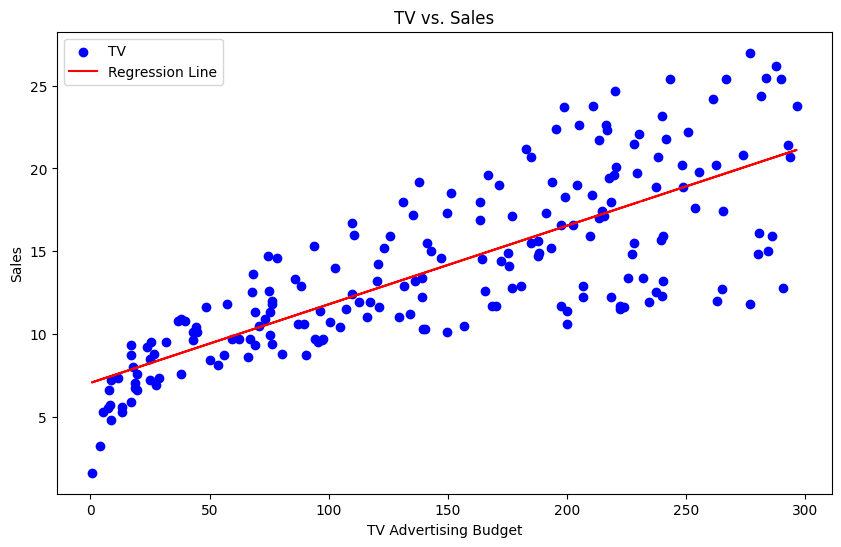


Mean Squared Error (MSE):
TV: 10.512652915656757


In [4]:
import matplotlib.pyplot as plt

# Scatter plot and regression line for TV vs. Sales
plt.figure(figsize=(10, 6))
plt.scatter(X_tv, y, color='blue', label='TV')
plt.plot(X_tv, model_tv.predict(X_tv), color='red', label='Regression Line')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('TV vs. Sales')
plt.legend()
plt.show()

# Calculate the error (residuals) for TV model
y_pred_tv = model_tv.predict(X_tv)
error_tv = y - y_pred_tv

# Print the mean squared error (MSE) for each model
print("\nMean Squared Error (MSE):")
print(f"TV: {np.mean(error_tv**2)}")

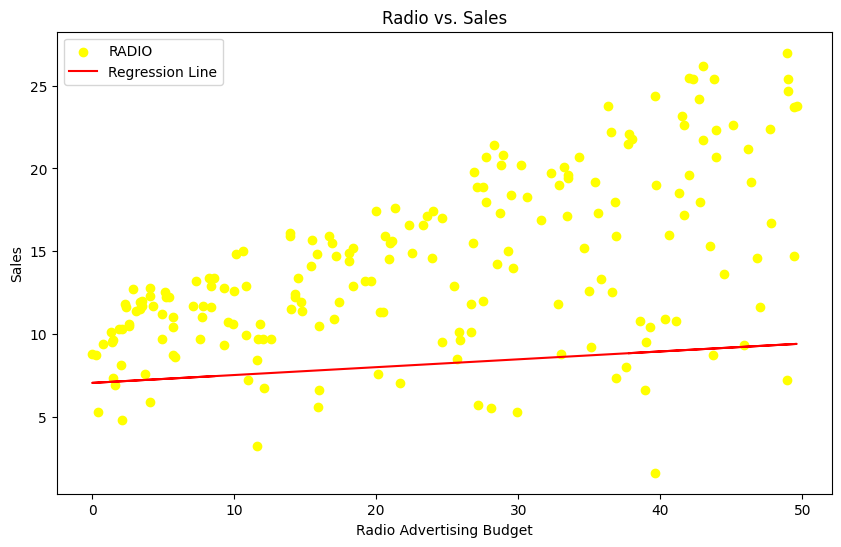


Mean Squared Error (MSE):
RADIO: 57.9805391540245


In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X_radio, y, color='yellow', label='RADIO')
plt.plot(X_radio, model_tv.predict(X_radio), color='red', label='Regression Line')
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.title('Radio vs. Sales')
plt.legend()
plt.show()

y_pred_radio = model_tv.predict(X_radio)
error_radio = y - y_pred_radio

print("\nMean Squared Error (MSE):")
print(f"RADIO: {np.mean(error_radio**2)}")

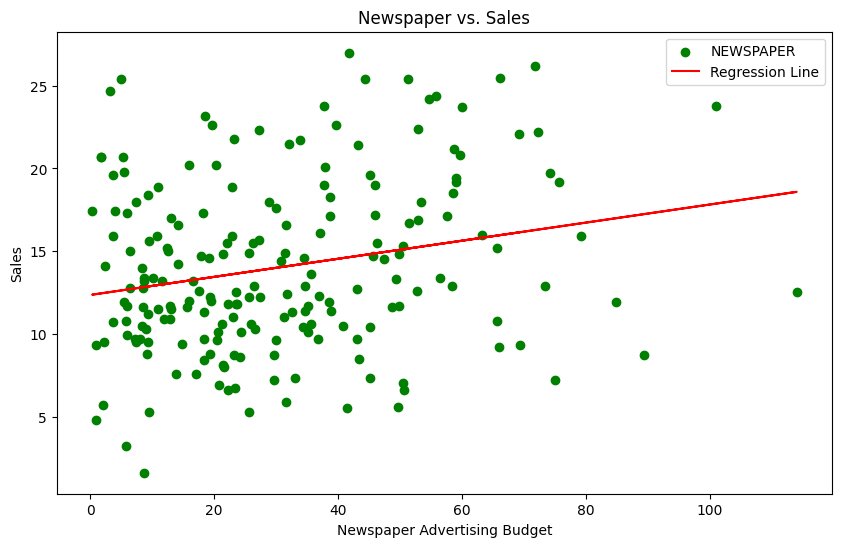


Mean Squared Error (MSE):
RADIO: 56.36178838794478


In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X_np, y, color='green', label='NEWSPAPER')
plt.plot(X_np, model_newspaper.predict(X_np), color='red', label='Regression Line')
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Sales')
plt.title('Newspaper vs. Sales')
plt.legend()
plt.show()

y_pred_np = model_tv.predict(X_np)
error_np = y - y_pred_np

print("\nMean Squared Error (MSE):")
print(f"RADIO: {np.mean(error_np**2)}")